<a href="https://colab.research.google.com/github/gracebrazil28/Tensorflow_Colab_Notebooks/blob/main/Simple_FashionClassification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import tensorflow and GPU

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

###Import Fashion Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


###Training Data - Plotting a Specific Training Data

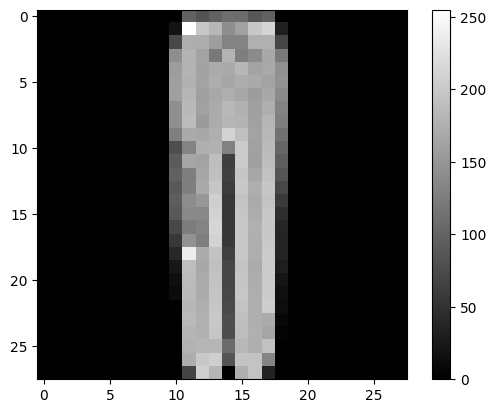

In [4]:
import matplotlib.pyplot as plt
idx = 1000

plt.figure()
plt.imshow(train_images[idx], cmap= 'gray')
plt.colorbar()
plt.show()

In [5]:
train_labels[idx]

1

### Validation Data

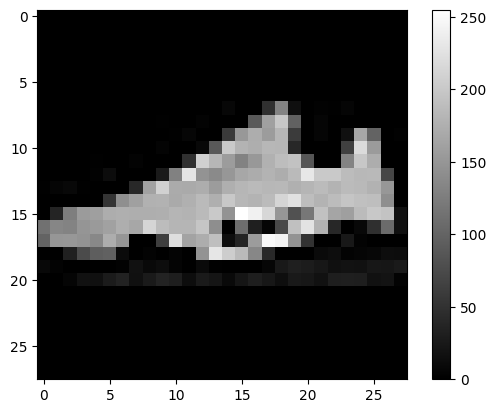

In [6]:
import matplotlib.pyplot as plt
idx = 999

plt.figure()
plt.imshow(valid_images[idx], cmap= 'gray')
plt.colorbar()
plt.show()

In [7]:
valid_labels[999]

7

### Neuron -> Linear Regression
Since each image is 28x28, there will be 784 weights with 0 being black and 255 being white. The neuron is mimicked with the linear regression function y= w0x0 + w1x1 .. + w784x784.

### Creating the model
Layers are the basic building blocks of neural networks in Keras. Neural network is created with two layers: Layer 1 is flattening multidimensional data into 1-dimension and Layer 2 is a row of neurons that will classify the images.

In [12]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(train_labels.max()+1)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plotting the model

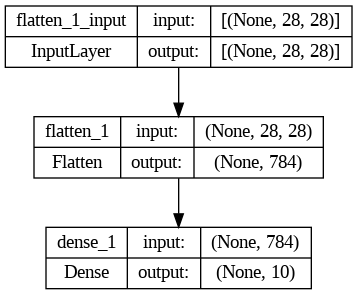

In [13]:
tf.keras.utils.plot_model(model, show_shapes = True)

### Optimizer
Adam (Adaptive Moment Estimation) optimizer is an efficient gradient-based optimization algorithm widely used in machine learning for training neural networks. It addresses shortcomings of earlier optimizers like Stochastic Gradient Descent (SGD) by adapting the learning rate for each parameter based on historical gradients.

### Training the model with the Loss Function
The loss function measures how well the model is performing on a specific task. During training, the algorithm tries to adjust its internal parameters to minimize this loss across the entire training dataset.

Chosen loss function = Sparse Categorical Cross-entropy
https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

### Metrics
Metrics are performance measures used to evaluate a machine learning model's effectiveness on the training and validation datasets. Accuracy is the percentage of correct predictions.

In [14]:
model.compile(optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

### Model Evaluation


In [17]:
eval = model.fit(train_images, train_labels, epochs = 10, verbose=True, validation_data = (valid_images, valid_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 16.2676 - accuracy: 0.7462 - val_loss: 18.0169 - val_accuracy: 0.7269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 12.3353 - accuracy: 0.7882 - val_loss: 14.2448 - val_accuracy: 0.7714
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 11.0531 - accuracy: 0.7953 - val_loss: 13.4148 - val_accuracy: 0.7680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.8473 - accuracy: 0.7986 - val_loss: 11.6031 - val_accuracy: 0.8014
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.7767 - accuracy: 0.8020 - val_loss: 10.6665 - val_accuracy: 0.7950
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 10.6461 - accuracy: 0.8039 - val_loss: 16.6779 - val_accuracy: 0.7408
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.2928 - accuracy: 0.8035 - val_loss: 11.6522 -

#### Specific Evaluation


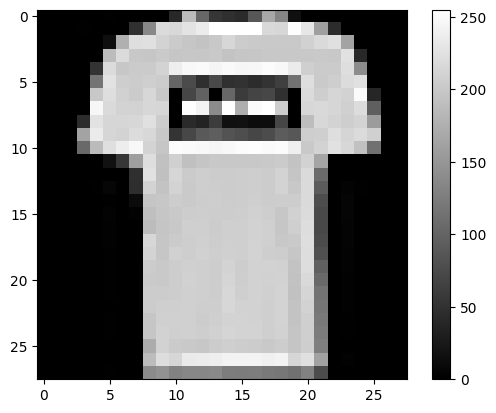

1/1 [==============================] - 0s 21ms/step


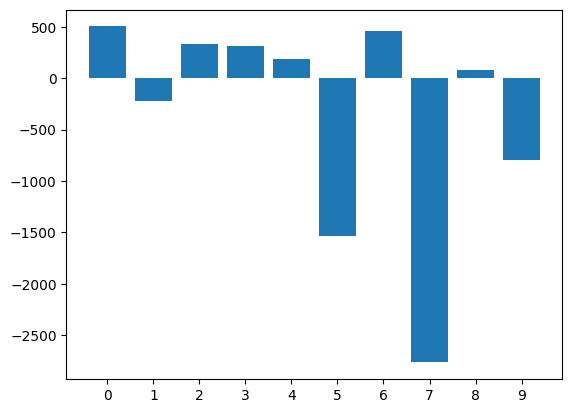

correct answer: 0


In [23]:
idx = 1

plt.figure()
plt.imshow(train_images[idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(train_labels.max()+1)
plt.figure()
plt.bar(x_values, model.predict(train_images[idx:idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[idx])